# Linear SVM classifier

## Download the dataset

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [10]:
print('100 examples with two features:\n{}'.format(X.shape))

100 examples with two features
(100, 2)


In [12]:
print('A single label per example:\n{}'.format(y.shape))

A single label per example:
(100,)


In [8]:
# Labels are ordered 

y[0:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

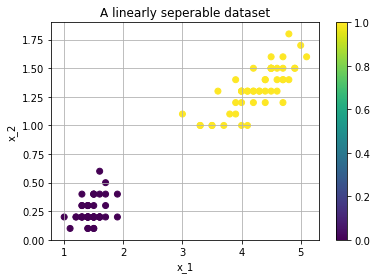

In [20]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.grid(which='both')
plt.title('A linearly seperable dataset')
plt.colorbar()

## Train a linear SVM classifier

In [78]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# Create a pipeline of required stages
svm_clf = Pipeline([
    ('Feature_scaling', StandardScaler()),
    ('Linear_SVC', LinearSVC(C=1, loss='hinge'))
])

svm_clf.fit(X, y)
X_transformed = svm_clf['Feature_scaling'].transform(X)

In [79]:
svm_clf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### Calculate the decision boundary

In [106]:
import numpy as np

coef = svm_clf['Linear_SVC'].coef_[0]
intercept = svm_clf['Linear_SVC'].intercept_[0]

print(coef)
print(intercept)

def calc_decision_boundary(min_x_1, max_x_1, intercept, coef):

    x_1 = np.linspace(-1.5, 1.5, num=100)
    x_2 = (-intercept - coef[0]*x_1) / coef[1]
    
    return x_1, x_2
    
x_1, x_2 = calc_decision_boundary(-1.5, 1.5, intercept, coef)

[1.0607458  1.00177835]
0.2958887668023068


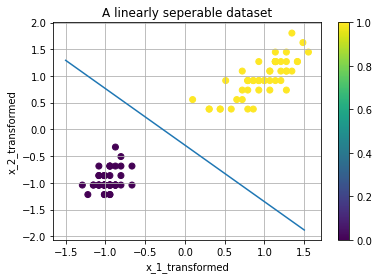

In [107]:
# Note plotting the transformed data (as prediction function will output this)

def plot_decision_boundary(X_trans, x_1, x_2):

    plt.scatter(X_transformed[:,0], X_transformed[:,1], c=y)
    plt.plot(x_1, x_2)
    plt.xlabel('x_1_transformed')
    plt.ylabel('x_2_transformed')
    plt.grid(which='both')
    plt.title('A linearly seperable dataset')
    plt.colorbar()

plot_decision_boundary(X_transformed, x_1, x_2)

## Train an SVC classifier

In [120]:
from sklearn.svm import SVC

svc_clf = Pipeline([
    ('Feature scaling', StandardScaler()),
    ('svc', SVC(kernel='linear', coef0=1, C=0.001))
])

svc_clf.fit(X, y)
svc_clf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### Plot the decision boundary

In [121]:
intercept = svc_clf['svc'].intercept_[0]
coeff = svc_clf['svc'].coef_[0]

x_1_svc, x_2_svc = calc_decision_boundary(-1.5, 1.5, intercept, coef)

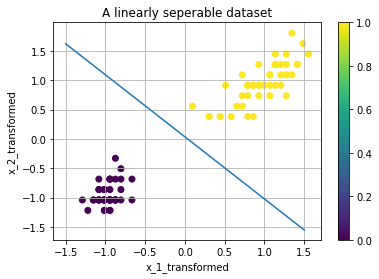

In [122]:
plot_decision_boundary(X_transformed, x_1_svc, x_2_svc)